In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn
from torch.utils.tensorboard import SummaryWriter
from torchvision import datasets

# Writer will output to ./runs/ directory by default
writer = SummaryWriter()

In [ ]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


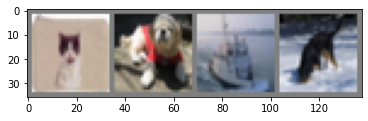

  cat   dog  ship   dog


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

grid = torchvision.utils.make_grid(images)
writer.add_image('images', grid, 0)
writer.add_graph(net, images)
writer.close()
# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [ ]:
import torch.nn as nn
import torch.nn.functional as F
#import torch.nn.LeakyReLU as L

class ConvNet(nn.Module):
    def init(self):
        super(ConvNet, self).init()
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=5, stride=1, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer2 = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=5, stride=1, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.drop_out = nn.Dropout()
        self.fc1 = nn.Linear(7 * 7 * 64, 1000)
        self.fc2 = nn.Linear(1000, 10)

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.leaky_relu(self.conv1(x)))
        x = self.pool(F.leaky_relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.leaky_relu(self.fc1(x))
        x = F.leaky_relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

### TO TEACHER:
Why should we use lr 0.0001? Useless in this case, why not 0.1 huhuhuhuhh?

In [ ]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.0001)

In [ ]:
for epoch in range(10):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0


print('Finished Training')

[1,  2000] loss: 2.064
[1,  4000] loss: 1.815
[1,  6000] loss: 1.703
[1,  8000] loss: 1.649
[1, 10000] loss: 1.623
[1, 12000] loss: 1.603
[2,  2000] loss: 1.580
[2,  4000] loss: 1.516
[2,  6000] loss: 1.510
[2,  8000] loss: 1.495
[2, 10000] loss: 1.491
[2, 12000] loss: 1.469
[3,  2000] loss: 1.447
[3,  4000] loss: 1.448
[3,  6000] loss: 1.413
[3,  8000] loss: 1.396
[3, 10000] loss: 1.391
[3, 12000] loss: 1.371
[4,  2000] loss: 1.371
[4,  4000] loss: 1.329
[4,  6000] loss: 1.349
[4,  8000] loss: 1.337
[4, 10000] loss: 1.329
[4, 12000] loss: 1.309
[5,  2000] loss: 1.290
[5,  4000] loss: 1.284
[5,  6000] loss: 1.286
[5,  8000] loss: 1.254
[5, 10000] loss: 1.266
[5, 12000] loss: 1.264
[6,  2000] loss: 1.220
[6,  4000] loss: 1.238
[6,  6000] loss: 1.227
[6,  8000] loss: 1.212
[6, 10000] loss: 1.232
[6, 12000] loss: 1.208
[7,  2000] loss: 1.171
[7,  4000] loss: 1.186
[7,  6000] loss: 1.175
[7,  8000] loss: 1.186
[7, 10000] loss: 1.176
[7, 12000] loss: 1.156
[8,  2000] loss: 1.125
[8,  4000] 

In [ ]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [ ]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %f %%' % (
    100 * correct / total))

### Accuracy of first

#### Adam
[10, 12000] loss: 0.253
Finished Training

Accuracy of the network on the 10000 test images: 62.160000 %


In [ ]:
!pip install tensorboard
tensorboard --logdir=runs

In [ ]:
from torch.utils.tensorboard import SummaryWriter
import numpy as np

writer = SummaryWriter()

for n_iter in range(100):
    writer.add_scalar('Loss/train', np.random.random(), n_iter)
    writer.add_scalar('Loss/test', np.random.random(), n_iter)
    writer.add_scalar('Accuracy/train', np.random.random(), n_iter)
    writer.add_scalar('Accuracy/test', np.random.random(), n_iter)